In [2]:
from sklearn.datasets import make_regression
X, y = make_regression(
    n_samples=10, n_features=3, random_state=1, noise=1)

feature_names = ['f_' + str(i) for i in range(3)]

In [3]:
# using numpy
import numpy as np 

class TreeRegressor_numpy:
    def __init__(self, max_depth=1, splitter='mse'):
        self.max_depth = max_depth
        self.splitter = splitter
        self.initialize()
    
    def initialize(self):
        self.split_score = float('inf')
        self.split_threshold = None
        self.split_left_pred = None
        self.split_right_pred = None
        self.split_feature = None
        
    def mse(self, y, y_pred):
        return np.mean((y - y_pred)**2, axis=1)
    
    def make_split_feature(self, X, y):
        thresholds = [None]*(len(X) - 1)
        for idx in range(len(X)-1):
            sorted_X = sorted(X)
            thresholds[idx] = (sorted_X[idx+1] + sorted_X[idx]) / 2
        
        split_score = float('inf')
        split_threshold = None
        split_left_pred = None
        split_right_pred = None
                
        for threshold in thresholds:
            left = []
            right = []
            for idx, val in enumerate(X):
                if val < threshold:
                    left.append(idx)
                else:
                    right.append(idx)

            left_node_pred = np.mean([y[i] for i in left])
            rigth_node_pred = np.mean([y[i] for i in right])
            
            y_pred = []
            for idx, val in enumerate(X):
                if val < threshold:
                    y_pred.append(left_node_pred)
                else:
                    y_pred.append(rigth_node_pred)
            y_pred = np.array(y_pred).reshape(-1,)
            score = np.mean((y - y_pred)**2)
            if split_score > score:
                split_score = score
                split_threshold = threshold
                split_left_pred = left_node_pred
                split_right_pred = rigth_node_pred
        return split_score, split_threshold, split_left_pred, split_right_pred 
        
    def get_best_split(self, X, y):
        best_split = [float('inf')]
        best_feature = None 
        for idx in range(len(X)):
            feature = X[idx, :]
            split_result = self.make_split_feature(feature, y)
            if best_split[0] > split_result[0]:
                best_split = split_result
                best_feature = idx
        self.split_score, self.split_threshold, \
            self.split_left_pred, self.split_right_pred = best_split
        self.split_feature = best_feature
        
        
    def train(self, X, y):
        """
        X: (n:number of features, m:sample size)
        y: (m, )
        """
        X = X.T
        self.initialize()
        self.get_best_split(X, y)
    
    def predict(self, X):
        X = X.T
        y_pred = []
        for feature in X[self.split_feature, :]:
            if feature < self.split_threshold:
                y_pred.append(self.split_left_pred)
            else: 
                y_pred.append(self.split_right_pred)
        return np.array(y_pred)
        

tr = TreeRegressor_numpy()
tr.train(X, y)
tr.predict(X)
print(f"split features: {feature_names[tr.split_feature]}")
print(f"split threshold: {tr.split_threshold:0.3f}")
print(f"left node prediction: {tr.split_left_pred:0.3f}")
print(f"right node prediction: {tr.split_right_pred:0.3f}")


split features: f_1
split threshold: -0.286
left node prediction: -25.173
right node prediction: 25.226


[Text(0.5, 0.75, 'f_1 <= -0.286\nsquared_error = 794.239\nsamples = 10\nvalue = 5.066'),
 Text(0.25, 0.25, 'squared_error = 78.623\nsamples = 4\nvalue = -25.173'),
 Text(0.75, 0.25, 'squared_error = 255.274\nsamples = 6\nvalue = 25.226')]

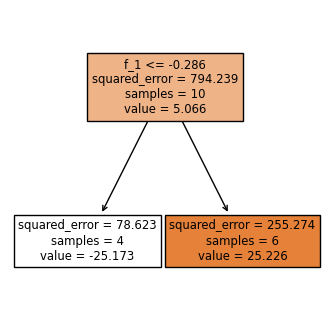

In [24]:
import matplotlib.pyplot as plt 
from sklearn.tree import DecisionTreeRegressor, plot_tree

dt = DecisionTreeRegressor(
    criterion='squared_error', splitter='best', max_depth=1)

dt.fit(X,y)
plt.figure(figsize=(4,4))
plot_tree(dt, filled=True, feature_names=feature_names)